In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import datasets
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from sklearn.model_selection import train_test_split

In [28]:
# data = load_iris()

In [85]:
X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

In [86]:
X.shape,y.shape

((100, 1), (100,))

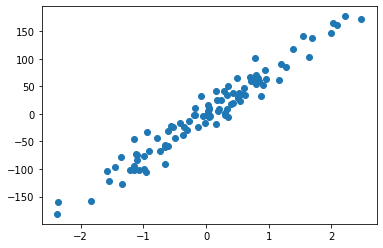

In [87]:
plt.scatter(X, y)

In [88]:
class LinearRegression():
    def __init__(self,learning_rate,n_iterations):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def fit(self,X,y):
        n_samples,n_features = X.shape
        
        # Initialize weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for i in range(self.n_iterations):
            y_pred = np.dot(X,self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T,(y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
        #print(self.weights,self.bias)
    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred

In [89]:
def r2_score(y_pred,y_actual):
    r2 = 1 - (np.sum(np.square((y_pred - y_actual)))/np.sum(np.square((y_actual - np.average(y_pred)))))
    return r2

# def r2_score1(y_true, y_pred):
#     corr_matrix = np.corrcoef(y_true, y_pred)
#     corr = corr_matrix[0, 1]
#     return corr ** 2

In [90]:
def mse(y_pred,y_actual):
    m = (1/y_pred.shape[0])*np.sum(np.square(y_actual-y_pred))
    return m

# def mean_squared_error(y_true, y_pred):
#     return np.mean((y_true - y_pred) ** 2)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

In [92]:
LR = LinearRegression(0.01,1000)
LR.fit(X_train,y_train)

In [93]:
y_pred = LR.predict(X_test)

In [94]:
mse(y_pred,y_test)

305.7719958301902

In [95]:
r2_score(y_pred,y_test)

0.9247921016519501

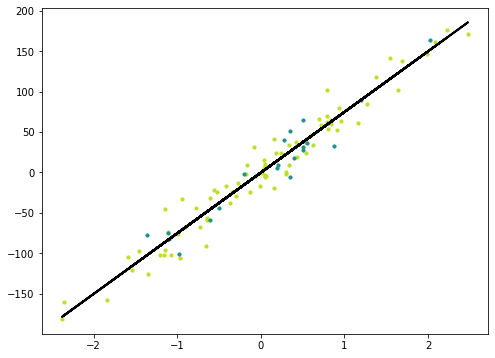

In [96]:
y_pred_line = LR.predict(X)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()